In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.utils import resample
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [3]:
df = df.drop(['id','sex','entry_date','date_symptoms','date_died','obesity'],axis = 1)
df.head()

,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,1,97
1,1,97,2,24,97,2,2,2,2,2,2,2,2,2,99,1,97
2,2,2,2,54,2,2,2,2,2,2,2,2,2,2,99,1,2
3,2,2,1,30,97,2,2,2,2,2,2,2,2,2,99,1,2
4,2,2,2,60,2,1,2,2,2,1,2,1,2,2,99,1,2


In [4]:
def unique_values(df):
    for i in df.columns:
        print(f' feature <{i}> has {df[i].unique()} values')
        print('='*75)

In [5]:
def valuecounts(df):
    for i in df.columns:
        print(f' feature <{i}> has {df[i].value_counts()} value counts')
        print('='*75)

In [6]:
df.shape

(566602, 17)

In [7]:
valuecounts(df)

 feature <patient_type> has 1    444689
2    121913
Name: patient_type, dtype: int64 value counts
 feature <intubed> has 97    444689
2     111824
1       9965
99       124
Name: intubed, dtype: int64 value counts
 feature <pneumonia> has 2     478416
1      88175
99        11
Name: pneumonia, dtype: int64 value counts
 feature <age> has 30     14604
31     13911
36     13890
38     13847
37     13836
       ...  
118        1
117        1
116        1
115        1
111        1
Name: age, Length: 120, dtype: int64 value counts
 feature <pregnancy> has 97    287112
2     273840
1       4063
98      1587
Name: pregnancy, dtype: int64 value counts
 feature <diabetes> has 2     493790
1      70831
98      1981
Name: diabetes, dtype: int64 value counts
 feature <copd> has 2     555723
1       9130
98      1749
Name: copd, dtype: int64 value counts
 feature <asthma> has 2     546824
1      18026
98      1752
Name: asthma, dtype: int64 value counts
 feature <inmsupr> has 2     555644
1       

In [8]:
one_count = df[df['covid_res']==1]
two_count = df[df['covid_res']==2]
three_count = df[df['covid_res']==3]
one_count

,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,1,97
1,1,97,2,24,97,2,2,2,2,2,2,2,2,2,99,1,97
2,2,2,2,54,2,2,2,2,2,2,2,2,2,2,99,1,2
3,2,2,1,30,97,2,2,2,2,2,2,2,2,2,99,1,2
4,2,2,2,60,2,1,2,2,2,1,2,1,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220652,2,2,1,88,2,1,2,2,2,1,2,2,2,2,99,1,2
220653,1,97,2,30,2,2,2,2,2,2,2,2,2,2,99,1,97
220654,1,97,2,27,2,2,2,2,2,2,2,2,2,2,2,1,97
220655,1,97,2,36,2,2,2,1,2,2,2,2,2,2,1,1,97


In [9]:
df_sample1 = resample(one_count,
                     replace = False,
                     n_samples = 5000,
                     random_state = 42)
df_sample2 = resample(two_count,
                     replace = False,
                     n_samples = 5000,
                     random_state = 42)
df_sample3 = resample(three_count,
                     replace = False,
                     n_samples = 5000,
                     random_state = 42)

In [10]:
print(f' shape of first sample is {df_sample1.shape}\n\n shape of second sample is {df_sample2.shape}\n\n shape of third sample is {df_sample3.shape}')

 shape of first sample is (5000, 17)

 shape of second sample is (5000, 17)

 shape of third sample is (5000, 17)


In [11]:
df_new = pd.concat([df_sample1,df_sample2,df_sample3])
df_new

,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,renal_chronic,tobacco,contact_other_covid,covid_res,icu
48477,2,1,1,44,97,2,2,2,2,2,2,2,2,2,2,1,1
170717,1,97,2,38,97,2,2,2,2,2,2,2,2,2,2,1,97
178085,2,2,1,77,97,1,2,2,2,1,2,2,2,2,2,1,2
179134,1,97,2,71,2,2,2,2,2,2,2,2,2,2,2,1,97
13383,1,97,2,36,97,2,2,2,2,2,2,2,2,2,1,1,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509824,1,97,2,61,2,2,2,2,2,1,2,2,2,1,1,3,97
563767,2,2,2,52,97,2,2,2,2,2,2,2,2,2,99,3,2
524607,1,97,2,36,97,2,2,2,2,2,2,2,2,2,1,3,97
559439,1,97,2,43,97,2,2,2,2,2,2,2,2,2,1,3,97


In [12]:
unique_values(df_new)

 feature <patient_type> has [2 1] values
 feature <intubed> has [ 1 97  2] values
 feature <pneumonia> has [1 2] values
 feature <age> has [ 44  38  77  71  36  26  55  31  32  53  50  85  66  63  52  34  78  28
  39  35  41  24  42  33  17  10  25  48  56  57  68  97  30  27  22  37
  74  59  20  65  47  43  40  19  61  29  67  51   2  45  14  58  54  73
  72  23  15  64  76  46  69  60  81  62  70  75  49  21   4  89   1  84
  79  12  13  18  80   6  83  98  87  82  86   0  91   5  88   3  11  93
  16   9  90  96   8  92  95  94   7 100] values
 feature <pregnancy> has [97  2 98  1] values
 feature <diabetes> has [ 2  1 98] values
 feature <copd> has [ 2  1 98] values
 feature <asthma> has [ 2  1 98] values
 feature <inmsupr> has [ 2  1 98] values
 feature <hypertension> has [ 2  1 98] values
 feature <other_disease> has [ 2  1 98] values
 feature <cardiovascular> has [ 2  1 98] values
 feature <renal_chronic> has [ 2  1 98] values
 feature <tobacco> has [ 2  1 98] values
 feature <c

In [13]:
valuecounts(df_new)

 feature <patient_type> has 1    11670
2     3330
Name: patient_type, dtype: int64 value counts
 feature <intubed> has 97    11670
2      3090
1       240
Name: intubed, dtype: int64 value counts
 feature <pneumonia> has 2    12622
1     2378
Name: pneumonia, dtype: int64 value counts
 feature <age> has 36     412
30     385
35     368
31     367
42     365
      ... 
95       4
96       2
100      2
97       2
98       1
Name: age, Length: 100, dtype: int64 value counts
 feature <pregnancy> has 97    7607
2     7247
1       96
98      50
Name: pregnancy, dtype: int64 value counts
 feature <diabetes> has 2     13039
1      1906
98       55
Name: diabetes, dtype: int64 value counts
 feature <copd> has 2     14719
1       233
98       48
Name: copd, dtype: int64 value counts
 feature <asthma> has 2     14485
1       467
98       48
Name: asthma, dtype: int64 value counts
 feature <inmsupr> has 2     14703
1       242
98       55
Name: inmsupr, dtype: int64 value counts
 feature <hyperten

In [14]:
df_new.columns

Index(['patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [15]:
replace_list = [ 'pregnancy', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'renal_chronic', 'tobacco']
for i in replace_list:
    df_new[i] = df_new[i].replace(98,0)

In [16]:
valuecounts(df_new)

 feature <patient_type> has 1    11670
2     3330
Name: patient_type, dtype: int64 value counts
 feature <intubed> has 97    11670
2      3090
1       240
Name: intubed, dtype: int64 value counts
 feature <pneumonia> has 2    12622
1     2378
Name: pneumonia, dtype: int64 value counts
 feature <age> has 36     412
30     385
35     368
31     367
42     365
      ... 
95       4
96       2
100      2
97       2
98       1
Name: age, Length: 100, dtype: int64 value counts
 feature <pregnancy> has 97    7607
2     7247
1       96
0       50
Name: pregnancy, dtype: int64 value counts
 feature <diabetes> has 2    13039
1     1906
0       55
Name: diabetes, dtype: int64 value counts
 feature <copd> has 2    14719
1      233
0       48
Name: copd, dtype: int64 value counts
 feature <asthma> has 2    14485
1      467
0       48
Name: asthma, dtype: int64 value counts
 feature <inmsupr> has 2    14703
1      242
0       55
Name: inmsupr, dtype: int64 value counts
 feature <hypertension> has 2 

In [17]:
'intubed','contact_other_covid', 'icu'
df_new['intubed'] = df_new['intubed'].replace(97,0)
df_new['contact_other_covid'] = df_new['contact_other_covid'].replace(99,0)
df_new['icu'] = df_new['icu'].replace(97,0)
df_new['pregnancy'] = df_new['pregnancy'].replace(97,0)

In [18]:
valuecounts(df_new)

 feature <patient_type> has 1    11670
2     3330
Name: patient_type, dtype: int64 value counts
 feature <intubed> has 0    11670
2     3090
1      240
Name: intubed, dtype: int64 value counts
 feature <pneumonia> has 2    12622
1     2378
Name: pneumonia, dtype: int64 value counts
 feature <age> has 36     412
30     385
35     368
31     367
42     365
      ... 
95       4
96       2
100      2
97       2
98       1
Name: age, Length: 100, dtype: int64 value counts
 feature <pregnancy> has 0    7657
2    7247
1      96
Name: pregnancy, dtype: int64 value counts
 feature <diabetes> has 2    13039
1     1906
0       55
Name: diabetes, dtype: int64 value counts
 feature <copd> has 2    14719
1      233
0       48
Name: copd, dtype: int64 value counts
 feature <asthma> has 2    14485
1      467
0       48
Name: asthma, dtype: int64 value counts
 feature <inmsupr> has 2    14703
1      242
0       55
Name: inmsupr, dtype: int64 value counts
 feature <hypertension> has 2    12426
1     25

**0 indicates that the data is not known..1 indicates "YES" and 2 indicates "NO"**

**patienttype 1 indicates Male and 2 indicates Female**

In [19]:
df_new.head()

,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,renal_chronic,tobacco,contact_other_covid,covid_res,icu
48477,2,1,1,44,0,2,2,2,2,2,2,2,2,2,2,1,1
170717,1,0,2,38,0,2,2,2,2,2,2,2,2,2,2,1,0
178085,2,2,1,77,0,1,2,2,2,1,2,2,2,2,2,1,2
179134,1,0,2,71,2,2,2,2,2,2,2,2,2,2,2,1,0
13383,1,0,2,36,0,2,2,2,2,2,2,2,2,2,1,1,0


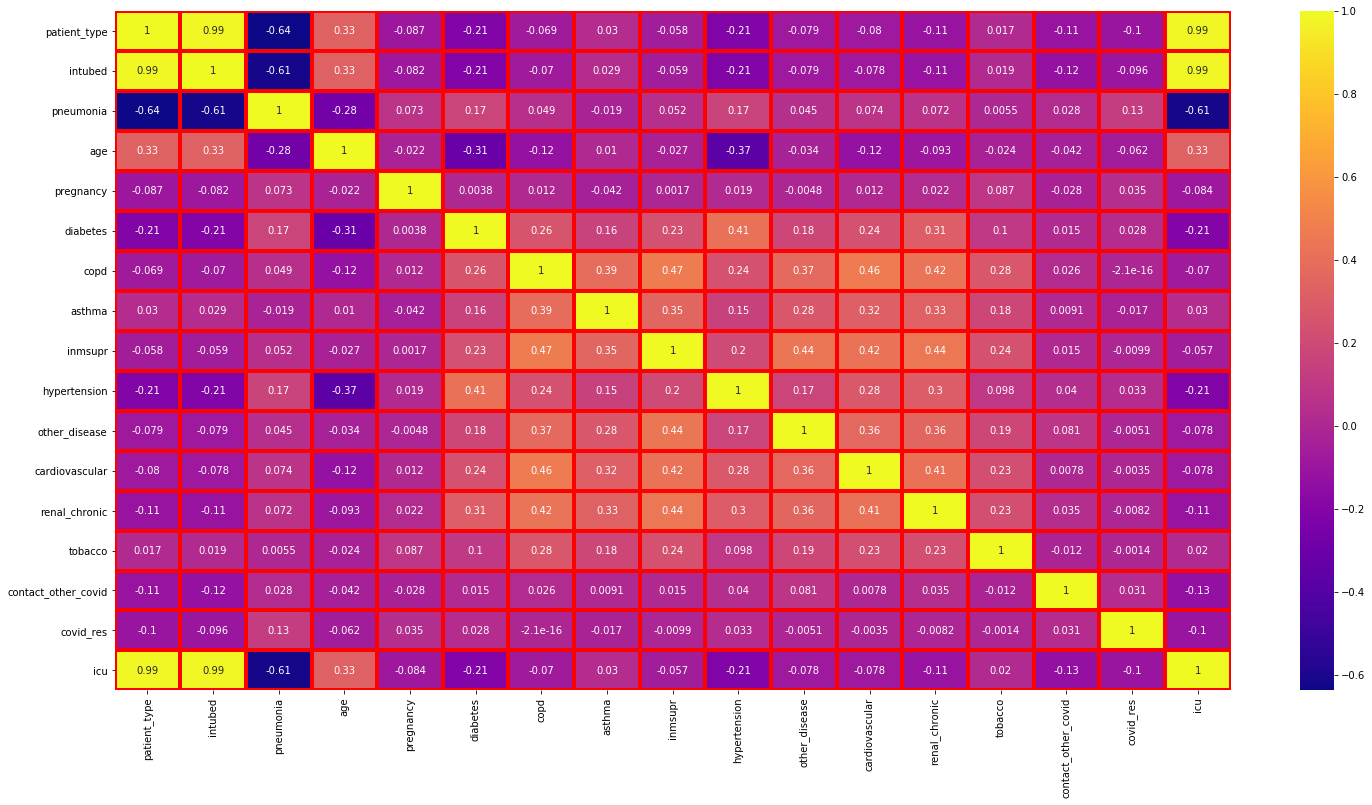

In [20]:
plt.figure(figsize=(25,12.5))
sn.heatmap(df_new.corr(),annot=True,linecolor='red',linewidths=3,cmap = 'plasma')

In [21]:
df_new.columns

Index(['patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [22]:
drop_list = ['inmsupr','copd','renal_chronic']
for i in drop_list:
    df_new.drop(i,axis = 1,inplace=True)

In [23]:
df_new.head()

,patient_type,intubed,pneumonia,age,pregnancy,diabetes,asthma,hypertension,other_disease,cardiovascular,tobacco,contact_other_covid,covid_res,icu
48477,2,1,1,44,0,2,2,2,2,2,2,2,1,1
170717,1,0,2,38,0,2,2,2,2,2,2,2,1,0
178085,2,2,1,77,0,1,2,1,2,2,2,2,1,2
179134,1,0,2,71,2,2,2,2,2,2,2,2,1,0
13383,1,0,2,36,0,2,2,2,2,2,2,1,1,0


In [24]:
upper_limit = []
lower_limit = []
for i in df_new.columns:
    upper_limit.append(df_new[i].mean() + (df_new[i].std())*3)
    lower_limit.append(df_new[i].mean() - (df_new[i].std())*3)

In [25]:
j = 0
for i in df_new.columns:
    temp = df_new[(df_new[i]>upper_limit[j]) | (df_new[i]<lower_limit[j])];j+=1

In [26]:
test = df_new['covid_res']
train =  df_new.drop(['covid_res'],axis = 1)

In [27]:
dummy_list = ['patient_type', 'intubed', 'pneumonia', 'pregnancy', 'diabetes',
       'asthma', 'hypertension', 'other_disease', 'cardiovascular', 'tobacco',
       'contact_other_covid', 'icu']
train = pd.get_dummies(df_new,columns=dummy_list,drop_first=True)

In [28]:
train.head()

,age,covid_res,patient_type_2,intubed_1,intubed_2,pneumonia_2,pregnancy_1,pregnancy_2,diabetes_1,diabetes_2,asthma_1,asthma_2,hypertension_1,hypertension_2,other_disease_1,other_disease_2,cardiovascular_1,cardiovascular_2,tobacco_1,tobacco_2,contact_other_covid_1,contact_other_covid_2,icu_1,icu_2
48477,44,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0
170717,38,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
178085,77,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
179134,71,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
13383,36,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0


In [29]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size = 0.3)

[Text(558.0, 566.25, 'covid_res <= 1.5\ngini = 0.667\nsamples = 10500\nvalue = [3547, 3472, 3481]\nclass = positive'),
 Text(279.0, 339.75, 'gini = 0.0\nsamples = 3547\nvalue = [3547, 0, 0]\nclass = positive'),
 Text(837.0, 339.75, 'covid_res <= 2.5\ngini = 0.5\nsamples = 6953\nvalue = [0, 3472, 3481]\nclass = notknown'),
 Text(558.0, 113.25, 'gini = 0.0\nsamples = 3472\nvalue = [0, 3472, 0]\nclass = negative'),
 Text(1116.0, 113.25, 'gini = 0.0\nsamples = 3481\nvalue = [0, 0, 3481]\nclass = notknown')]

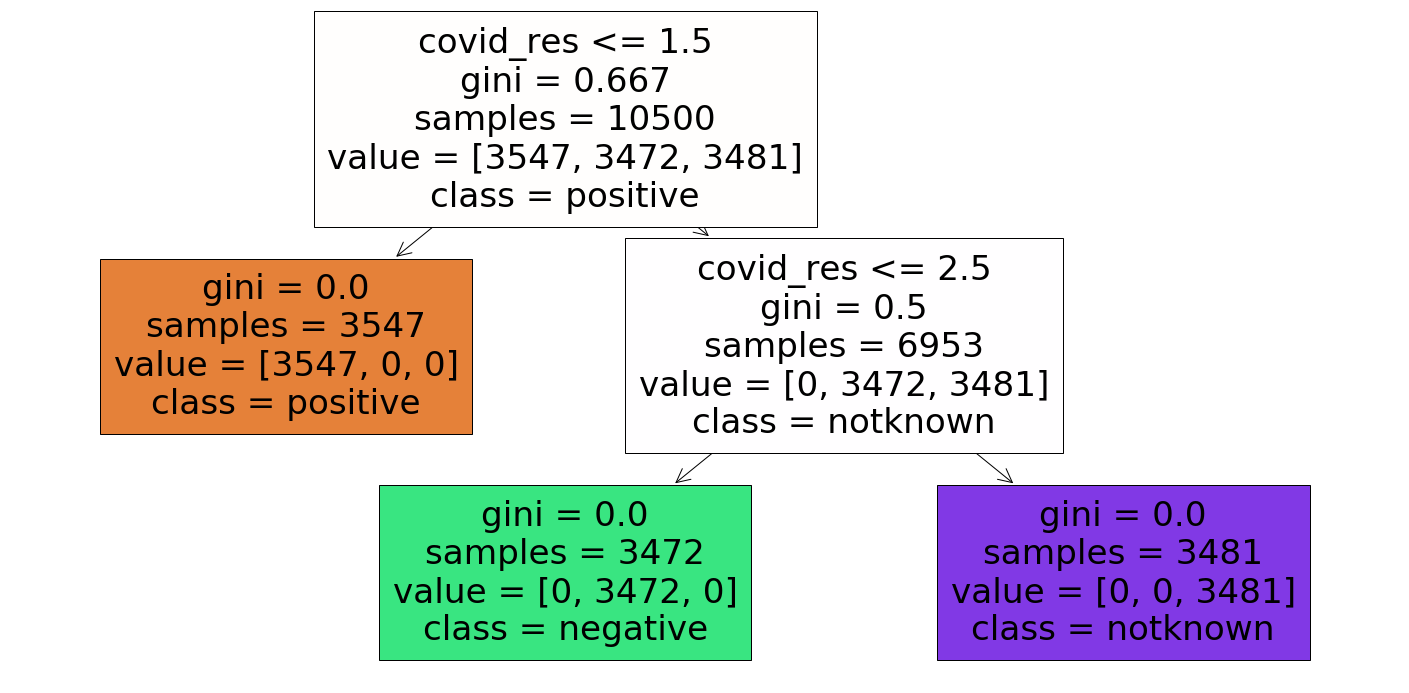

In [31]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
plt.figure(figsize=(25,12.5))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=['positive','negative','notknown'])

In [32]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [33]:
alpha_list = []
for i in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    clf.fit(X_train,y_train)
    alpha_list.append(clf)

In [34]:
alpha_list

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3310946833501126, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.33554156154784665, random_state=0)]

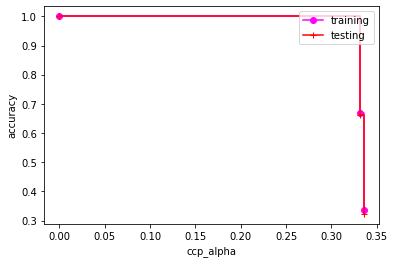

In [35]:
train_score = [clf.score(X_train,y_train) for clf in alpha_list]
test_score = [clf.score(X_test,y_test) for clf in alpha_list]

plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alphas,train_score,marker = 'o',color = 'magenta',label = 'training',drawstyle = 'steps-post')
plt.plot(ccp_alphas,test_score,marker = '+',color = 'red',label = 'testing',drawstyle = 'steps-post')
plt.legend()
plt.show()

In [36]:
params = {
    'RandomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(start=100,stop=1200,num=10)],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'ccp_alpha':[0.33207382522839934,0.33456942193713346],
        }
    },
    'DecisionTree':{
        'model':DecisionTreeClassifier(),
        'params':{
            #'criterion':['gini','entropy'],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'ccp_alpha':[0.33207382522839934,0.33456942193713346],
            'splitter':['best','random'],
        }
    },
}

In [37]:
scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv = 5,n_iter = 10,scoring = 'accuracy',verbose = 2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score': clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=711, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=8, ccp_alpha=0.33456942193713346 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=711, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=8, ccp_alpha=0.33456942193713346, total=   2.3s
[CV] n_estimators=711, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=8, ccp_alpha=0.33456942193713346 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=711, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=8, ccp_alpha=0.33456942193713346, total=   2.3s
[CV] n_estimators=711, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=8, ccp_alpha=0.33456942193713346 
[CV]  n_estimators=711, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=8, ccp_alpha=0.33456942193713346, total=   2.3s
[CV] n_estimators=711, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=8, ccp_alpha=0.33456942193713346 
[CV]  n_estimators=711, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=8, ccp_alpha=0.33456942193713346, total=   2.4s
[CV] n_estimators=711, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=8, ccp_alpha=0.33456942193713346 
[CV]  n_estimators=711, min_samples_split=12, min_samples_leaf=12, max_features=sqrt, max_depth=8, ccp_alpha=0.33456942193713346, total=   2.2s
[CV] n_estimators=466, min_samples_sp

[CV]  n_estimators=1077, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=15, ccp_alpha=0.33207382522839934, total=   3.8s
[CV] n_estimators=1077, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=15, ccp_alpha=0.33207382522839934 
[CV]  n_estimators=1077, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=15, ccp_alpha=0.33207382522839934, total=   3.9s
[CV] n_estimators=1077, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=15, ccp_alpha=0.33207382522839934 
[CV]  n_estimators=1077, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=15, ccp_alpha=0.33207382522839934, total=   4.0s
[CV] n_estimators=955, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1, ccp_alpha=0.33456942193713346 
[CV]  n_estimators=955, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=1, ccp_alpha=0.33456942193713346, total=   2.1s
[CV] n_estimators=955, min_samples_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] splitter=random, min_samples_split=12, min_samples_leaf=5, max_depth=1, ccp_alpha=0.33456942193713346 
[CV]  splitter=random, min_samples_split=12, min_samples_leaf=5, max_depth=1, ccp_alpha=0.33456942193713346, total=   0.0s
[CV] splitter=random, min_samples_split=12, min_samples_leaf=5, max_depth=1, ccp_alpha=0.33456942193713346 
[CV]  splitter=random, min_samples_split=12, min_samples_leaf=5, max_depth=1, ccp_alpha=0.33456942193713346, total=   0.0s
[CV] splitter=random, min_samples_split=12, min_samples_leaf=5, max_depth=1, ccp_alpha=0.33456942193713346 
[CV]  splitter=random, min_samples_split=12, min_samples_leaf=5, max_depth=1, ccp_alpha=0.33456942193713346, total=   0.0s
[CV] splitter=random, min_samples_split=12, min_samples_leaf=5, max_depth=1, ccp_alpha=0.33456942193713346 
[CV]  splitter=random, min_samples_split=12, min_samples_leaf=5, max_depth=1, ccp_alpha=0.33456942193713346, total=   0.0s
[CV] splitter=r

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  splitter=best, min_samples_split=12, min_samples_leaf=10, max_depth=8, ccp_alpha=0.33456942193713346, total=   0.0s
[CV] splitter=best, min_samples_split=5, min_samples_leaf=10, max_depth=22, ccp_alpha=0.33207382522839934 
[CV]  splitter=best, min_samples_split=5, min_samples_leaf=10, max_depth=22, ccp_alpha=0.33207382522839934, total=   0.0s
[CV] splitter=best, min_samples_split=5, min_samples_leaf=10, max_depth=22, ccp_alpha=0.33207382522839934 
[CV]  splitter=best, min_samples_split=5, min_samples_leaf=10, max_depth=22, ccp_alpha=0.33207382522839934, total=   0.0s
[CV] splitter=best, min_samples_split=5, min_samples_leaf=10, max_depth=22, ccp_alpha=0.33207382522839934 
[CV]  splitter=best, min_samples_split=5, min_samples_leaf=10, max_depth=22, ccp_alpha=0.33207382522839934, total=   0.0s
[CV] splitter=best, min_samples_split=5, min_samples_leaf=10, max_depth=22, ccp_alpha=0.33207382522839934 
[CV]  splitter=best, min_samples_split=5, min_samples_leaf=10, max_depth=22, ccp_alp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


In [38]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,1.000000,(DecisionTreeClassifier(ccp_alpha=0.3345694219...
1,DecisionTree,0.669333,DecisionTreeClassifier(ccp_alpha=0.33207382522...


In [39]:
df_new

,patient_type,intubed,pneumonia,age,pregnancy,diabetes,asthma,hypertension,other_disease,cardiovascular,tobacco,contact_other_covid,covid_res,icu
48477,2,1,1,44,0,2,2,2,2,2,2,2,1,1
170717,1,0,2,38,0,2,2,2,2,2,2,2,1,0
178085,2,2,1,77,0,1,2,1,2,2,2,2,1,2
179134,1,0,2,71,2,2,2,2,2,2,2,2,1,0
13383,1,0,2,36,0,2,2,2,2,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509824,1,0,2,61,2,2,2,1,2,2,1,1,3,0
563767,2,2,2,52,0,2,2,2,2,2,2,0,3,2
524607,1,0,2,36,0,2,2,2,2,2,2,1,3,0
559439,1,0,2,43,0,2,2,2,2,2,2,1,3,0


In [40]:
for i in scores_df['best_estimator']:
    print(i)
    print('='*75)

RandomForestClassifier(ccp_alpha=0.33456942193713346, max_depth=8,
                       max_features='sqrt', min_samples_leaf=12,
                       min_samples_split=12, n_estimators=711)
DecisionTreeClassifier(ccp_alpha=0.33207382522839934, max_depth=30,
                       min_samples_leaf=12)


In [41]:
rf = RandomForestClassifier(ccp_alpha=0.33207382522839934, max_depth=1,
                       max_features='log2', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=222)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

1.0

In [42]:
rf.score(X_test,y_test)

1.0

[Text(446.4, 366.93, 'covid_res <= 1.5\ngini = 0.667\nsamples = 10500\nvalue = [3547, 3472, 3481]\nclass = positive'),
 Text(223.2, 122.31, 'gini = 0.0\nsamples = 3547\nvalue = [3547, 0, 0]\nclass = positive'),
 Text(669.5999999999999, 122.31, 'gini = 0.5\nsamples = 6953\nvalue = [0, 3472, 3481]\nclass = notknown')]

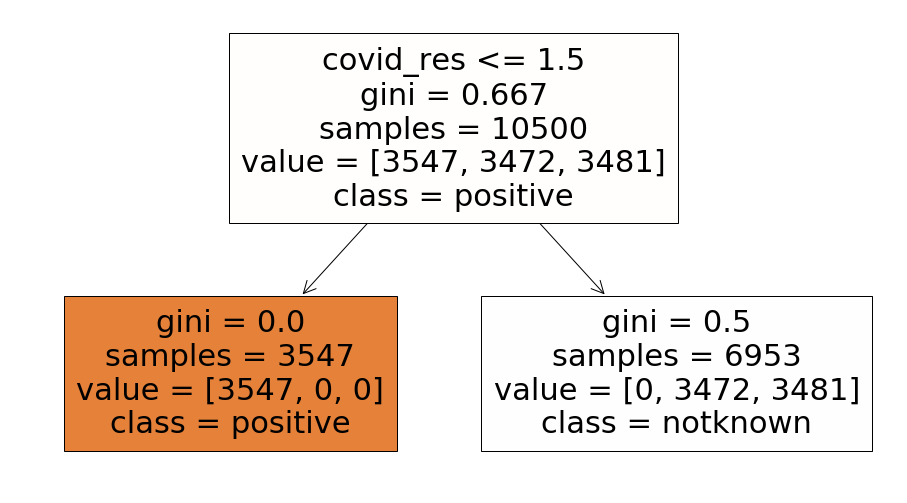

In [43]:
clf = DecisionTreeClassifier(ccp_alpha=0.33207382522839934,random_state=0)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns,class_names=['positive','negative','notknown'])

In [44]:
train.columns

Index(['age', 'covid_res', 'patient_type_2', 'intubed_1', 'intubed_2',
       'pneumonia_2', 'pregnancy_1', 'pregnancy_2', 'diabetes_1', 'diabetes_2',
       'asthma_1', 'asthma_2', 'hypertension_1', 'hypertension_2',
       'other_disease_1', 'other_disease_2', 'cardiovascular_1',
       'cardiovascular_2', 'tobacco_1', 'tobacco_2', 'contact_other_covid_1',
       'contact_other_covid_2', 'icu_1', 'icu_2'],
      dtype='object')

In [45]:
df_new.head()

,patient_type,intubed,pneumonia,age,pregnancy,diabetes,asthma,hypertension,other_disease,cardiovascular,tobacco,contact_other_covid,covid_res,icu
48477,2,1,1,44,0,2,2,2,2,2,2,2,1,1
170717,1,0,2,38,0,2,2,2,2,2,2,2,1,0
178085,2,2,1,77,0,1,2,1,2,2,2,2,1,2
179134,1,0,2,71,2,2,2,2,2,2,2,2,1,0
13383,1,0,2,36,0,2,2,2,2,2,2,1,1,0


## USING MEAN ENCODING

In [46]:
temp = df_new.copy()

In [48]:
mean_map = []
for i in temp.columns:
    mean_map.append(temp.groupby([i])['covid_res'].mean())

In [49]:
mean_map

[patient_type
 1    2.045416
 2    1.840841
 Name: covid_res, dtype: float64,
 intubed
 0    2.045416
 1    1.554167
 2    1.863107
 Name: covid_res, dtype: float64,
 pneumonia
 1    1.763667
 2    2.044525
 Name: covid_res, dtype: float64,
 age
 0      2.350877
 1      2.204082
 2      2.075000
 3      2.190476
 4      2.081081
          ...   
 95     1.750000
 96     1.500000
 97     1.000000
 98     1.000000
 100    2.000000
 Name: covid_res, Length: 100, dtype: float64,
 pregnancy
 0    1.971921
 1    2.031250
 2    2.029253
 Name: covid_res, dtype: float64,
 diabetes
 0    2.290909
 1    1.919203
 2    2.010584
 Name: covid_res, dtype: float64,
 asthma
 0    2.229167
 1    2.044968
 2    1.997791
 Name: covid_res, dtype: float64,
 hypertension
 0    2.230769
 1    1.927439
 2    2.013761
 Name: covid_res, dtype: float64,
 other_disease
 0    2.119403
 1    1.992718
 2    1.999656
 Name: covid_res, dtype: float64,
 cardiovascular
 0    2.142857
 1    1.982558
 2    1.999932
 Name:

In [50]:
j = 0
for i in temp.columns:
    temp[i] = temp[i].map(mean_map[j]);j+=1

In [51]:
temp.head()

,patient_type,intubed,pneumonia,age,pregnancy,diabetes,asthma,hypertension,other_disease,cardiovascular,tobacco,contact_other_covid,covid_res,icu
48477,1.840841,1.554167,1.763667,2.039157,1.971921,2.010584,1.997791,2.013761,1.999656,1.999932,2.000292,2.017319,1,1.751908
170717,2.045416,2.045416,2.044525,1.979290,1.971921,2.010584,1.997791,2.013761,1.999656,1.999932,2.000292,2.017319,1,2.045416
178085,1.840841,1.863107,1.763667,1.983051,1.971921,1.919203,1.997791,1.927439,1.999656,1.999932,2.000292,2.017319,1,1.848435
179134,2.045416,2.045416,2.044525,1.936842,2.029253,2.010584,1.997791,2.013761,1.999656,1.999932,2.000292,2.017319,1,2.045416
13383,2.045416,2.045416,2.044525,1.973301,1.971921,2.010584,1.997791,2.013761,1.999656,1.999932,2.000292,2.025176,1,2.045416


In [52]:
test_temp = temp['covid_res']

train_temp = temp.drop(['covid_res'],axis = 1)

In [53]:
train_temp.head()

,patient_type,intubed,pneumonia,age,pregnancy,diabetes,asthma,hypertension,other_disease,cardiovascular,tobacco,contact_other_covid,icu
48477,1.840841,1.554167,1.763667,2.039157,1.971921,2.010584,1.997791,2.013761,1.999656,1.999932,2.000292,2.017319,1.751908
170717,2.045416,2.045416,2.044525,1.979290,1.971921,2.010584,1.997791,2.013761,1.999656,1.999932,2.000292,2.017319,2.045416
178085,1.840841,1.863107,1.763667,1.983051,1.971921,1.919203,1.997791,1.927439,1.999656,1.999932,2.000292,2.017319,1.848435
179134,2.045416,2.045416,2.044525,1.936842,2.029253,2.010584,1.997791,2.013761,1.999656,1.999932,2.000292,2.017319,2.045416
13383,2.045416,2.045416,2.044525,1.973301,1.971921,2.010584,1.997791,2.013761,1.999656,1.999932,2.000292,2.025176,2.045416


In [54]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_temp,test_temp,test_size = 0.3)

[Text(604.5960816056487, 668.175, 'patient_type <= 1.943\ngini = 0.667\nsamples = 10500\nvalue = [3457, 3508, 3535]\nclass = notknown'),
 Text(378.5407091572665, 645.525, 'age <= 2.061\ngini = 0.63\nsamples = 2327\nvalue = [1106, 478, 743]\nclass = positive'),
 Text(215.196420379202, 622.875, 'pneumonia <= 1.904\ngini = 0.61\nsamples = 2004\nvalue = [1031, 363, 610]\nclass = positive'),
 Text(60.54188685887258, 600.225, 'intubed <= 1.709\ngini = 0.582\nsamples = 1201\nvalue = [678, 204, 319]\nclass = positive'),
 Text(12.38909136609275, 577.575, 'diabetes <= 1.965\ngini = 0.431\nsamples = 133\nvalue = [97, 19, 17]\nclass = positive'),
 Text(6.378211458015405, 554.925, 'age <= 1.987\ngini = 0.535\nsamples = 45\nvalue = [28, 6, 11]\nclass = positive'),
 Text(3.139015063107058, 532.275, 'age <= 1.836\ngini = 0.509\nsamples = 35\nvalue = [23, 6, 6]\nclass = positive'),
 Text(1.0686008725470835, 509.625, 'pregnancy <= 2.001\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]\nclass = notknown'),


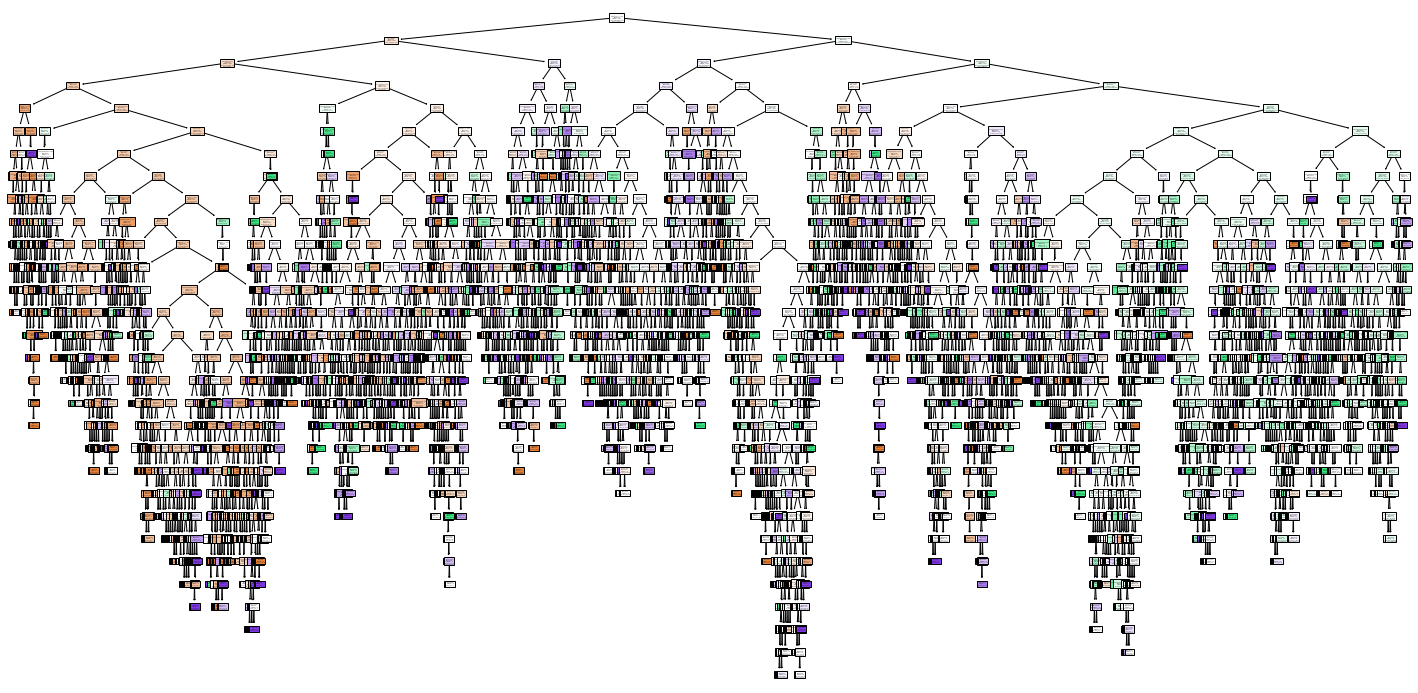

In [55]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train1,y_train1)
plt.figure(figsize=(25,12.5))
tree.plot_tree(clf,filled=True,feature_names=train_temp.columns,class_names=['positive','negative','notknown'])

In [59]:
path = clf.cost_complexity_pruning_path(X_train1,y_train1)
ccp_alphas = path.ccp_alphas

In [60]:
alpha_list = []
for i in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    clf.fit(X_train1,y_train1)
    alpha_list.append(clf)

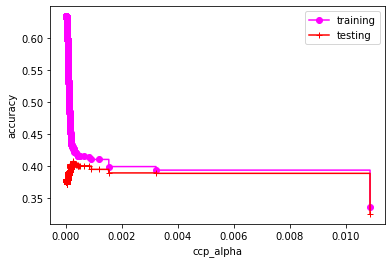

In [62]:
train_score = [clf.score(X_train1,y_train1) for clf in alpha_list]
test_score = [clf.score(X_test1,y_test1) for clf in alpha_list]

plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alphas,train_score,marker = 'o',color = 'magenta',label = 'training',drawstyle = 'steps-post')
plt.plot(ccp_alphas,test_score,marker = '+',color = 'red',label = 'testing',drawstyle = 'steps-post')
plt.legend()
plt.show()

In [63]:
params = {
    'RandomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(start=100,stop=1200,num=10)],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'ccp_alpha':[0.00195,0.002,0.003],
        }
    },
    'DecisionTree':{
        'model':DecisionTreeClassifier(),
        'params':{
            #'criterion':['gini','entropy'],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'ccp_alpha':[0.00195,0.002,0.003],
            'splitter':['best','random'],
        }
    },
}

In [64]:
scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv = 5,n_iter = 10,scoring = 'accuracy',verbose = 2)
    clf.fit(X_train1,y_train1)
    scores.append({
        'model_name':model_name,
        'best_score': clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=833, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=22, ccp_alpha=0.002 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=833, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=22, ccp_alpha=0.002, total=   3.3s
[CV] n_estimators=833, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=22, ccp_alpha=0.002 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=833, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=22, ccp_alpha=0.002, total=   3.8s
[CV] n_estimators=833, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=22, ccp_alpha=0.002 
[CV]  n_estimators=833, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=22, ccp_alpha=0.002, total=   3.6s
[CV] n_estimators=833, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=22, ccp_alpha=0.002 
[CV]  n_estimators=833, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=22, ccp_alpha=0.002, total=   3.5s
[CV] n_estimators=833, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=22, ccp_alpha=0.002 
[CV]  n_estimators=833, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=22, ccp_alpha=0.002, total=   3.8s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=12, max_features=sqrt, max_depth=30, ccp_alpha=0.00195 
[CV]  n_estimators

[CV]  n_estimators=1077, min_samples_split=5, min_samples_leaf=12, max_features=log2, max_depth=22, ccp_alpha=0.003, total=   5.0s
[CV] n_estimators=1077, min_samples_split=5, min_samples_leaf=12, max_features=log2, max_depth=22, ccp_alpha=0.003 
[CV]  n_estimators=1077, min_samples_split=5, min_samples_leaf=12, max_features=log2, max_depth=22, ccp_alpha=0.003, total=   4.8s
[CV] n_estimators=1077, min_samples_split=5, min_samples_leaf=12, max_features=log2, max_depth=22, ccp_alpha=0.003 
[CV]  n_estimators=1077, min_samples_split=5, min_samples_leaf=12, max_features=log2, max_depth=22, ccp_alpha=0.003, total=   4.5s
[CV] n_estimators=1077, min_samples_split=5, min_samples_leaf=12, max_features=log2, max_depth=22, ccp_alpha=0.003 
[CV]  n_estimators=1077, min_samples_split=5, min_samples_leaf=12, max_features=log2, max_depth=22, ccp_alpha=0.003, total=   4.5s
[CV] n_estimators=1077, min_samples_split=5, min_samples_leaf=12, max_features=log2, max_depth=22, ccp_alpha=0.003 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=15, ccp_alpha=0.002 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=15, ccp_alpha=0.002, total=   0.0s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=15, ccp_alpha=0.002 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=15, ccp_alpha=0.002, total=   0.0s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=15, ccp_alpha=0.002 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=15, ccp_alpha=0.002, total=   0.0s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=15, ccp_alpha=0.002 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=15, ccp_alpha=0.002, total=   0.0s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=15, ccp_alpha=0.002 
[CV]  splitter=best, min_samples_split=2, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=1, ccp_alpha=0.003, total=   0.0s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=1, ccp_alpha=0.003 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=1, ccp_alpha=0.003, total=   0.0s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=1, ccp_alpha=0.003 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=1, ccp_alpha=0.003, total=   0.0s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=2, max_depth=15, ccp_alpha=0.003 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=2, max_depth=15, ccp_alpha=0.003, total=   0.0s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=2, max_depth=15, ccp_alpha=0.003 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=2, max_depth=15, ccp_alpha=0.003, total=   0.0s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=2, max_depth=15, ccp_alpha=0.003 
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


In [65]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,0.401143,"(DecisionTreeClassifier(ccp_alpha=0.002, max_d..."
1,DecisionTree,0.396476,"DecisionTreeClassifier(ccp_alpha=0.002, max_de..."


### DUMMIES DOES THE GOOD JOB WRT TO LABEL ENCODER AND MEAN ENCODING!!!!

In [66]:
rf = RandomForestClassifier(ccp_alpha=0.33207382522839934, max_depth=1,
                       max_features='log2', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=222)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

1.0

In [67]:
rf.score(X_test,y_test)

1.0

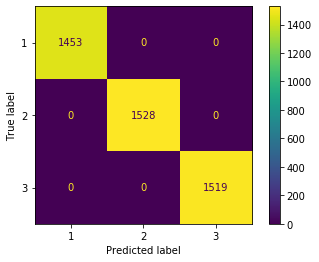

In [69]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

In [70]:
train.head()

,age,covid_res,patient_type_2,intubed_1,intubed_2,pneumonia_2,pregnancy_1,pregnancy_2,diabetes_1,diabetes_2,asthma_1,asthma_2,hypertension_1,hypertension_2,other_disease_1,other_disease_2,cardiovascular_1,cardiovascular_2,tobacco_1,tobacco_2,contact_other_covid_1,contact_other_covid_2,icu_1,icu_2
48477,44,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0
170717,38,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
178085,77,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
179134,71,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
13383,36,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0


In [71]:
df_new.head()

,patient_type,intubed,pneumonia,age,pregnancy,diabetes,asthma,hypertension,other_disease,cardiovascular,tobacco,contact_other_covid,covid_res,icu
48477,2,1,1,44,0,2,2,2,2,2,2,2,1,1
170717,1,0,2,38,0,2,2,2,2,2,2,2,1,0
178085,2,2,1,77,0,1,2,1,2,2,2,2,1,2
179134,1,0,2,71,2,2,2,2,2,2,2,2,1,0
13383,1,0,2,36,0,2,2,2,2,2,2,1,1,0


In [72]:
test

48477     1
170717    1
178085    1
179134    1
13383     1
         ..
509824    3
563767    3
524607    3
559439    3
504577    3
Name: covid_res, Length: 15000, dtype: int64

In [73]:
train['actual'] = test

In [74]:
train.head()

,age,covid_res,patient_type_2,intubed_1,intubed_2,pneumonia_2,pregnancy_1,pregnancy_2,diabetes_1,diabetes_2,asthma_1,asthma_2,hypertension_1,hypertension_2,other_disease_1,other_disease_2,cardiovascular_1,cardiovascular_2,tobacco_1,tobacco_2,contact_other_covid_1,contact_other_covid_2,icu_1,icu_2,actual
48477,44,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1
170717,38,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
178085,77,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,1
179134,71,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
13383,36,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1


In [75]:
valuecounts(train)

 feature <age> has 36     412
30     385
35     368
31     367
42     365
      ... 
95       4
96       2
100      2
97       2
98       1
Name: age, Length: 100, dtype: int64 value counts
 feature <covid_res> has 3    5000
2    5000
1    5000
Name: covid_res, dtype: int64 value counts
 feature <patient_type_2> has 0    11670
1     3330
Name: patient_type_2, dtype: int64 value counts
 feature <intubed_1> has 0    14760
1      240
Name: intubed_1, dtype: int64 value counts
 feature <intubed_2> has 0    11910
1     3090
Name: intubed_2, dtype: int64 value counts
 feature <pneumonia_2> has 1    12622
0     2378
Name: pneumonia_2, dtype: int64 value counts
 feature <pregnancy_1> has 0    14904
1       96
Name: pregnancy_1, dtype: int64 value counts
 feature <pregnancy_2> has 0    7753
1    7247
Name: pregnancy_2, dtype: int64 value counts
 feature <diabetes_1> has 0    13094
1     1906
Name: diabetes_1, dtype: int64 value counts
 feature <diabetes_2> has 1    13039
0     1961
Name: diabet

In [77]:
train = train.drop(['actual'],axis = 1)
train.head(3)

,age,covid_res,patient_type_2,intubed_1,intubed_2,pneumonia_2,pregnancy_1,pregnancy_2,diabetes_1,diabetes_2,asthma_1,asthma_2,hypertension_1,hypertension_2,other_disease_1,other_disease_2,cardiovascular_1,cardiovascular_2,tobacco_1,tobacco_2,contact_other_covid_1,contact_other_covid_2,icu_1,icu_2
48477,44,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0
170717,38,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
178085,77,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1


In [78]:
temp_train = np.array(train)
predict = []
for i in range(0,len(temp_train)):
    predict.append(rf.predict([temp_train[i]]))

In [79]:
predict = np.array(predict)
train['actual'] = test
train['predicted'] = predict

In [80]:
train.head()

,age,covid_res,patient_type_2,intubed_1,intubed_2,pneumonia_2,pregnancy_1,pregnancy_2,diabetes_1,diabetes_2,asthma_1,asthma_2,hypertension_1,hypertension_2,other_disease_1,other_disease_2,cardiovascular_1,cardiovascular_2,tobacco_1,tobacco_2,contact_other_covid_1,contact_other_covid_2,icu_1,icu_2,actual,predicted
48477,44,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,1
170717,38,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1
178085,77,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,1,1
179134,71,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1
13383,36,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1


In [83]:
df_new.head()

,patient_type,intubed,pneumonia,age,pregnancy,diabetes,asthma,hypertension,other_disease,cardiovascular,tobacco,contact_other_covid,covid_res,icu
48477,2,1,1,44,0,2,2,2,2,2,2,2,1,1
170717,1,0,2,38,0,2,2,2,2,2,2,2,1,0
178085,2,2,1,77,0,1,2,1,2,2,2,2,1,2
179134,1,0,2,71,2,2,2,2,2,2,2,2,1,0
13383,1,0,2,36,0,2,2,2,2,2,2,1,1,0


In [82]:
compare_list = ['covid_res','actual','predicted']
for i in compare_list:
    print(f' count of <{i}> is {train[i].value_counts()}')
    print('='*75)

 count of <covid_res> is 3    5000
2    5000
1    5000
Name: covid_res, dtype: int64
 count of <actual> is 3    5000
2    5000
1    5000
Name: actual, dtype: int64
 count of <predicted> is 3    5000
2    5000
1    5000
Name: predicted, dtype: int64


In [84]:
valuecounts(df_new)

 feature <patient_type> has 1    11670
2     3330
Name: patient_type, dtype: int64 value counts
 feature <intubed> has 0    11670
2     3090
1      240
Name: intubed, dtype: int64 value counts
 feature <pneumonia> has 2    12622
1     2378
Name: pneumonia, dtype: int64 value counts
 feature <age> has 36     412
30     385
35     368
31     367
42     365
      ... 
95       4
96       2
100      2
97       2
98       1
Name: age, Length: 100, dtype: int64 value counts
 feature <pregnancy> has 0    7657
2    7247
1      96
Name: pregnancy, dtype: int64 value counts
 feature <diabetes> has 2    13039
1     1906
0       55
Name: diabetes, dtype: int64 value counts
 feature <asthma> has 2    14485
1      467
0       48
Name: asthma, dtype: int64 value counts
 feature <hypertension> has 2    12426
1     2522
0       52
Name: hypertension, dtype: int64 value counts
 feature <other_disease> has 2    14521
1      412
0       67
Name: other_disease, dtype: int64 value counts
 feature <cardiovas

In [85]:
valuecounts(train)

 feature <age> has 36     412
30     385
35     368
31     367
42     365
      ... 
95       4
96       2
100      2
97       2
98       1
Name: age, Length: 100, dtype: int64 value counts
 feature <covid_res> has 3    5000
2    5000
1    5000
Name: covid_res, dtype: int64 value counts
 feature <patient_type_2> has 0    11670
1     3330
Name: patient_type_2, dtype: int64 value counts
 feature <intubed_1> has 0    14760
1      240
Name: intubed_1, dtype: int64 value counts
 feature <intubed_2> has 0    11910
1     3090
Name: intubed_2, dtype: int64 value counts
 feature <pneumonia_2> has 1    12622
0     2378
Name: pneumonia_2, dtype: int64 value counts
 feature <pregnancy_1> has 0    14904
1       96
Name: pregnancy_1, dtype: int64 value counts
 feature <pregnancy_2> has 0    7753
1    7247
Name: pregnancy_2, dtype: int64 value counts
 feature <diabetes_1> has 0    13094
1     1906
Name: diabetes_1, dtype: int64 value counts
 feature <diabetes_2> has 1    13039
0     1961
Name: diabet

In [86]:
import pickle

In [87]:
file = open('covid_prediction.pkl','wb')
pickle.dump(rf,file)
file.close()

In [88]:
y_pred = rf.predict(X_test)

In [89]:
report = metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1453
           2       1.00      1.00      1.00      1528
           3       1.00      1.00      1.00      1519

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

